In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [2]:
names_by_year = {}

for year in range(1880, 2019):
    names_by_year[year] = pd.read_csv(
        f'/Users/Maria/Downloads/names/yob{year}.txt',
        names=['name','sex','number']
    )
    
names = pd.concat(names_by_year).reset_index(level=1, drop=True)

**Задача 1.** Построить график изменения количества имен Ruth и Robert с 1900 по 2000

Text(0, 0.5, 'number')

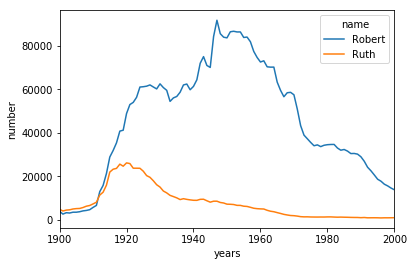

In [3]:
names_1 = names[(names['name']=='Ruth') | (names['name']=='Robert')]
names_1 = names_1.loc[range(1900,2001)]
names_1 = names_1.groupby([names_1.index, 'name']).sum()
names_1 = names_1.unstack('name')
names_1.columns = names_1.columns.droplevel(-2)
names_1.plot()
plt.xlabel('years')
plt.ylabel('number')

In [4]:
trace0 = go.Scatter(
    x=names_1.index,
    y=names_1.Robert,
    name='Robert'
)

trace1 = go.Scatter(
    x=names_1.index,
    y=names_1.Ruth,
    name='Ruth'
)
  
data = [trace0, trace1]
layout = {'title': 'Some names dynamics'}

fig = go.Figure(data=data, layout=layout)

iplot(fig)

**Задача 2.** Построить столбчатую диаграмму по количеству их имен с 1900 по 2000 с 5-летними промежутками (1900, 1905, 1910, …, 1995, 2000).

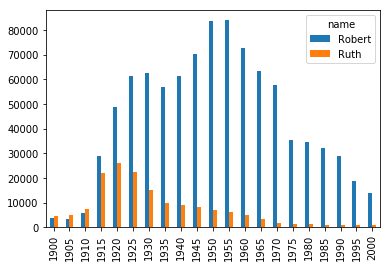

In [5]:
names_2 = names_1[0::5]
names_2.plot(kind='bar')

In [6]:
trace0 = go.Bar(
    x=names_2.index,
    y=names_2.Robert,
    name='Robert'
)

trace1 = go.Bar(
    x=names_2.index,
    y=names_2.Ruth,
    name='Ruth'
)
  
data = [trace0, trace1]
layout = {'title': 'Some names dynamics'}

fig = go.Figure(data=data, layout=layout)

iplot(fig)

**Задача 3.** Построить круговую диаграмму по количеству употреблений для ТОП-10 популярных имен, начинающихся на R, за 1950 год.

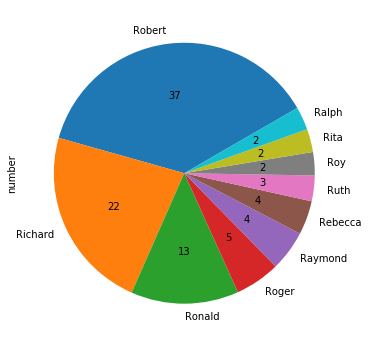

In [7]:
names_3 = names.loc['1950']
names_3 = names_3[names_3.name.str.startswith('R')]
names_3 = names_3.sort_values('number', ascending=False).head(10).set_index(['name'])
# names_3 = names_3[names_3.name.str.match('R.*')]
names_3.plot(kind='pie', y='number', startangle=30, autopct='%d', figsize=(6, 6), legend=False)

**Задача 4.** Построить точечную диаграмму по количеству согласных букв в именах и частоте употребления за 100 лет. Т.е. необходимо сложить всю статистику с 1900 до 2000, сгруппировать по именам, посчитать количество согласных букв в каждом имени и вывести на график отношение "Количество согласных букв в имени" : "Количество употреблений".

In [8]:
names_4 = names.loc[range(1900,2001)]
names_4.index.name = 'year'
names_4.reset_index(inplace=True)

In [9]:
vowels = list('AEIOUYaeiouy')
names_4['consonants'] = names_4.apply(lambda x: sum(i not in vowels for i in x['name']), axis=1)

In [10]:
names_4 = names_4.groupby(['year', 'consonants']).sum()
names_4.reset_index(inplace=True)

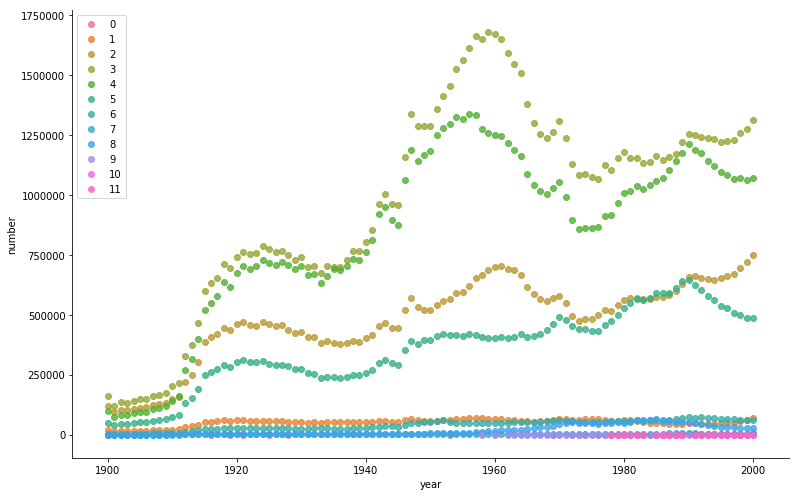

In [27]:
sns.lmplot(x="year", y="number", data=names_4, fit_reg=False, hue='consonants', legend=False, height=7, aspect=1.6)
plt.legend(loc='best')
plt.show()

*Этот график кажется более наглядным, чем точечный в данном случае*

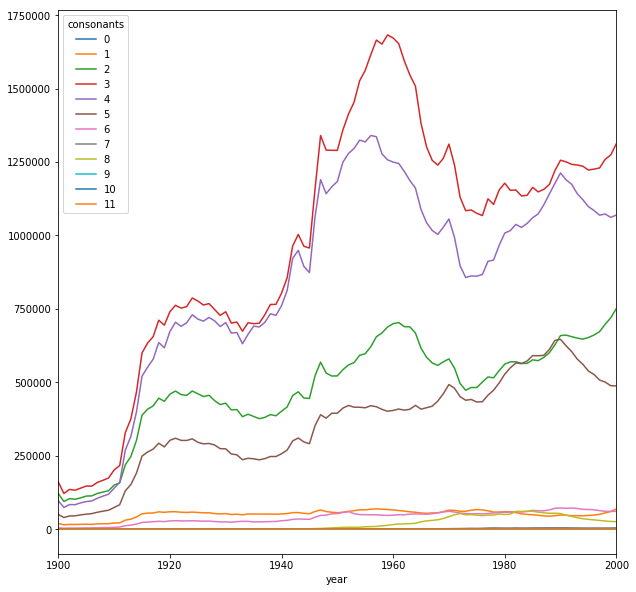

In [29]:
names_5 = names_4.pivot_table(index='year', 
                              columns='consonants', 
                              values='number', 
                              aggfunc=sum).fillna(0).applymap(int)
names_5.plot(figsize=(10,10))